In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy

f = open('./benchmark_data/quantum_plotter_input_sametotal.p', 'rb' )
plotter_inputs = []
while 1:
    try:
        plotter_inputs.append(pickle.load(f))
    except EOFError:
        break

In [2]:
repetition_idx = 1
case = (3,5)
plotter_input = plotter_inputs[repetition_idx][case]
print(plotter_input.keys())
circ = plotter_input['circ']
d1 = plotter_input['evaluations']['sv_noiseless']
d2 = plotter_input['evaluations']['qasm']
d3 = plotter_input['evaluations']['qasm+noise']
d4 = plotter_input['evaluations']['qasm+noise+cutting']
ground_truth = cross_entropy(target=d1,obs=d1)
qasm = cross_entropy(target=d1,obs=d2)
qasm_noise = cross_entropy(target=d1,obs=d3)
qasm_noise_cutting = cross_entropy(target=d1,obs=d4)

percent_change = 100*(qasm_noise - qasm_noise_cutting)/(qasm_noise - ground_truth)
# print(circ)
print(percent_change)

dict_keys(['num_shots', 'circ', 'evaluations', 'searcher_time', 'classical_time', 'quantum_time', 'uniter_time'])
-22.015708434821928


[0.4999999999999999, 0.5000000000000002]
1.0 1.0 0.7944779257741295 0.7551475669097594


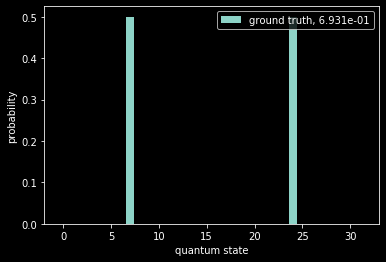

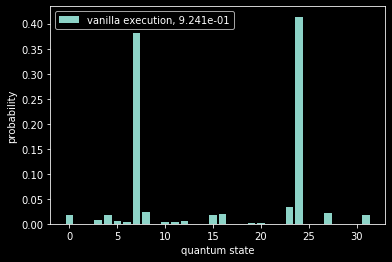

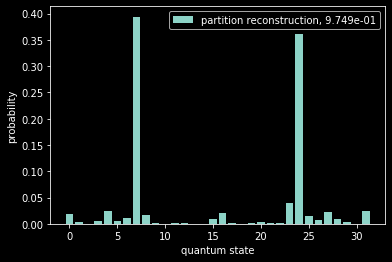

In [3]:
plot_range = min(64,len(d1))
x = np.arange(len(d1))[:plot_range]

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('ground_truth_eg.png')

plt.figure()
plt.bar(x,height=d3[:plot_range],label='vanilla execution, %.3e'%cross_entropy(d1,d3))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('vanilla_execution_eg.png')

plt.figure()
plt.bar(x,height=d4[:plot_range],label='partition reconstruction, %.3e'%cross_entropy(d1,d4))
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.savefig('partition_reconstruction_eg.png')

d1.sort()
d2.sort()
d3.sort()
d4.sort()
print(d1[-2:])
print(sum(d1[-2:]),sum(d2[-2:]),sum(d3[-2:]),sum(d4[-2:]))